Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.50MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 192kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 1.81MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 645kB/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/5], Loss: 0.0873
Epoch [2/5], Loss: 0.0365
Epoch [3/5], Loss: 0.0277
Epoch [4/5], Loss: 0.0239
Epoch [5/5], Loss: 0.0212


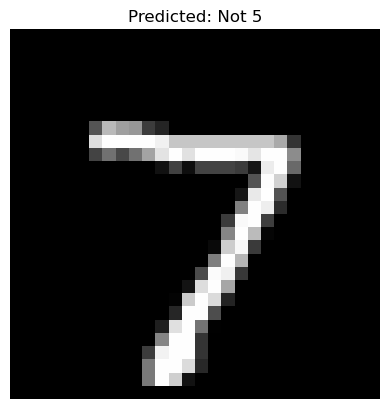

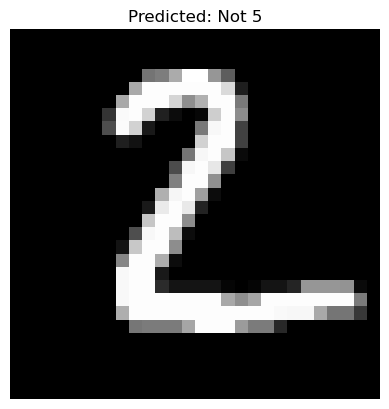

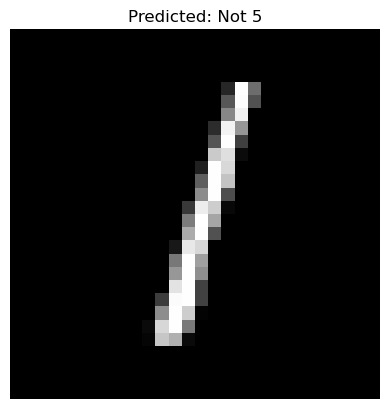

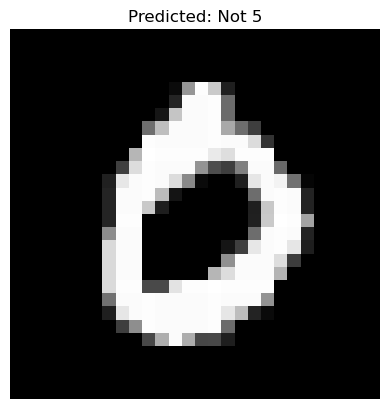

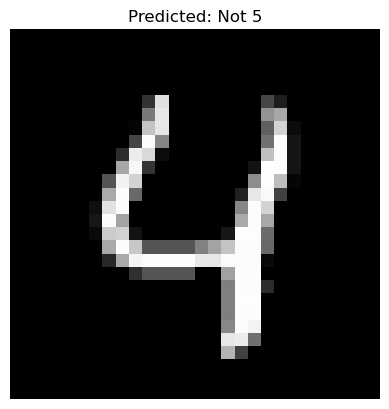

In [ ]:
# Write a neural network to classify the MNIST dataset (5/not 5)
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 1)          # Output layer (5/not 5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function for first layer
        x = torch.relu(self.fc2(x))  # Activation function for second layer
        y = self.fc3(x)              # Output layer
        return y
    
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Input layer
        self.fc2 = nn.Linear(256, 64)        # Hidden layer
        self.fc3 = nn.Linear(64, 1)          # Output layer (5/not 5)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))  # Activation function for first layer
        x = torch.relu(self.fc2(x))  # Activation function for second layer
        y = self.fc3(x)              # Output layer
        return y
    
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the neural network, loss function, and optimizer
model = SimpleNN2()
criterion = nn.MSELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # A

# Training the model
def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Convert labels to binary (5/not 5)
            labels = (labels == 5).float().view(-1, 1)  # Convert to float and reshape
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')

train(model, train_loader, criterion, optimizer, epochs=5)

# Lets classify a few examples + visualize    
import matplotlib.pyplot as plt
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            predictions = torch.sigmoid(outputs).round()  # Apply sigmoid and round to get binary predictions
            for i in range(10):  # Visualize first 5 examples
                plt.imshow(images[i].squeeze(), cmap='gray')
                plt.title(f'Predicted: {"5" if predictions[i].item() == 1 else "Not 5"}')
                plt.axis('off')
                plt.show()
            break  # Only visualize the first batch
visualize_predictions(model, test_loader)




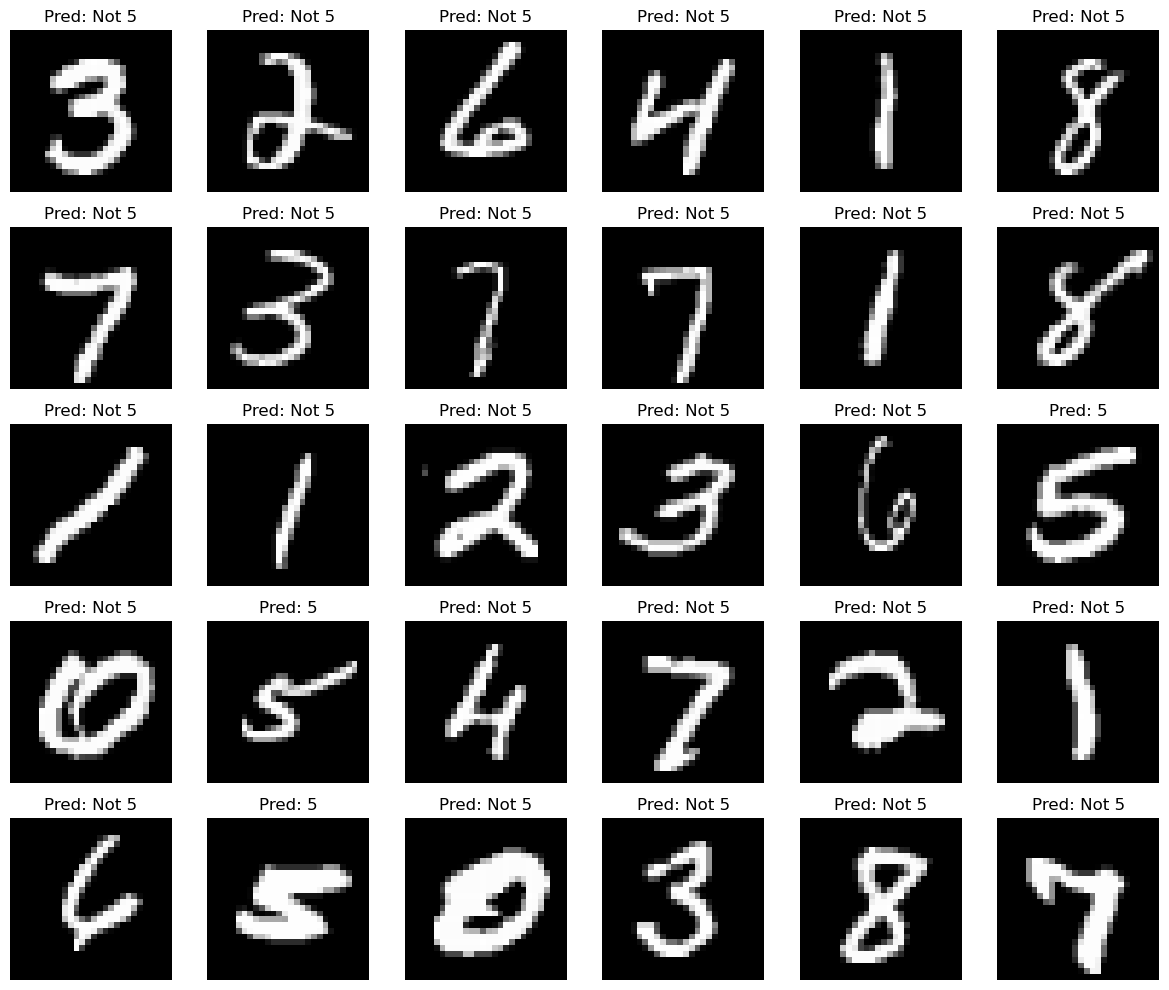

In [3]:
import random
import matplotlib.pyplot as plt
import torch

def visualize_predictions_grid(model, test_loader, num_images=30, grid_shape=(5,6)):
    model.eval()
    images_list = []
    labels_list = []
    preds_list = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            predictions = torch.sigmoid(outputs).round()
            images_list.append(images)
            labels_list.append(labels)
            preds_list.append(predictions)
        # Concatenate all batches
        all_images = torch.cat(images_list, dim=0)
        all_labels = torch.cat(labels_list, dim=0)
        all_preds = torch.cat(preds_list, dim=0)
        # Randomly select indices
        idxs = random.sample(range(len(all_images)), num_images)
        selected_images = all_images[idxs]
        selected_preds = all_preds[idxs]
    # Plot in a grid
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=(grid_shape[1]*2, grid_shape[0]*2))
    for i, ax in enumerate(axes.flat):
        img = selected_images[i].squeeze().cpu().numpy()
        pred = selected_preds[i].item()
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Pred: {"5" if pred == 1 else "Not 5"}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions_grid(model, test_loader, num_images=30, grid_shape=(5,6))
